In [38]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, on = "Mouse ID")

# Display the data table for preview
merged_data


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        b128          5           45.651331                 0  Capomulin
2        b128         10           43.270852                 0  Capomulin
3        b128         15           43.784893                 0  Capomulin
4        b128         20           42.731552                 0  Capomulin
5        b128         25           43.262145                 1  Capomulin
6        b128         30           40.605335                 1  Capomulin
7        b128         35           37.967644                 1  Capomulin
8        b128         40           38.379726                 2  Capomulin
9        b128         45           38.982878                 2  Capomulin
10       f932          0           45.000000                 0   Ketapril
11       g107          0           45.000000                 0   Ketapril
12       g107          5           48.791665                 0   Ketapril
13       g107         10           53.435987                 0   Ketapril
14       g107         15           58.135545                 0   Ketapril
15       g107         20           62.706031                 0   Ketapril
16       g107         25           64.663626                 0   Ketapril
17       g107         30           69.160520                 0   Ketapril
18       g107         35           71.905117                 0   Ketapril
19       a457          0           45.000000                 0   Ketapril
20       a457          5           47.462891                 0   Ketapril
21       a457         10           49.783419                 0   Ketapril
22       c819          0           45.000000                 0   Ketapril
23       c819          5           45.769249                 1   Ketapril
24       c819         10           46.658395                 1   Ketapril
25       c819         15           48.370999                 1   Ketapril
26       c819         20           49.762415                 1   Ketapril
27       c819         25           51.828357                 1   Ketapril
28       c819         30           56.098998                 1   Ketapril
29       c819         35           57.729535                 1   Ketapril
...       ...        ...                 ...               ...        ...
1876     i557         25           44.596219                 0  Capomulin
1877     i557         30           45.261384                 0  Capomulin
1878     i557         35           45.941949                 0  Capomulin
1879     i557         40           46.821070                 1  Capomulin
1880     i557         45           47.685963                 1  Capomulin
1881     m957          0           45.000000                 0  Capomulin
1882     m957          5           45.622381                 1  Capomulin
1883     m957         10           46.414518                 1  Capomulin
1884     m957         15           39.804453                 1  Capomulin
1885     m957         20           38.909349                 1  Capomulin
1886     m957         25           37.695432                 1  Capomulin
1887     m957         30           38.212479                 1  Capomulin
1888     m957         35           32.562839                 1  Capomulin
1889     m957         40           32.947615                 1  Capomulin
1890     m957         45           33.329098                 1  Capomulin
1891     f966          0           45.000000                 0  Capomulin
1892     f966          5           38.796474                 0  Capomulin
1893     f966         10           35.624403                 0  Capomulin
1894     f966         15           32.623003                 0  Capomulin
1895     f966         20           30.485985                 0  Capomulin
1896     m601          0           45.000000                 0  Capomulin
1897     m601          5           41.408591                 1  Capomulin
1898     

## Tumor Response to Treatment

In [39]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_data_gb = merged_data.groupby(["Drug","Timepoint"])
mean_tumor_vol = merged_data_gb["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol})
mean_tumor_vol_df = mean_tumor_vol_df.reset_index()

# Preview DataFrame
mean_tumor_vol_df.head()


Drug  Timepoint  Mean Tumor Volume
0  Capomulin          0          45.000000
1  Capomulin          5          44.266086
2  Capomulin         10          43.084291
3  Capomulin         15          42.064317
4  Capomulin         20          40.716325

In [40]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_vol = merged_data_gb["Tumor Volume (mm3)"].agg(np.std)/np.sqrt(merged_data_gb["Tumor Volume (mm3)"].count())

# Convert to DataFrame
std_tumor_vol_df = pd.DataFrame({"Std Error Tumor Volume": std_tumor_vol})
std_tumor_vol_df = std_tumor_vol_df.reset_index()

# Preview DataFrame
std_tumor_vol_df.head()


Drug  Timepoint  Std Error Tumor Volume
0  Capomulin          0                0.000000
1  Capomulin          5                0.448593
2  Capomulin         10                0.702684
3  Capomulin         15                0.838617
4  Capomulin         20                0.909731

In [41]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_df_2 = mean_tumor_vol_df.set_index(["Drug", "Timepoint"]).unstack(level=0)
std_tumor_vol_df_2 = std_tumor_vol_df.set_index(["Drug", "Timepoint"]).unstack(level=0)

# Preview that Reformatting worked
mean_tumor_vol_df_2


Mean Tumor Volume                                              \
Drug              Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                 
0                 45.000000  45.000000  45.000000  45.000000  45.000000   
5                 44.266086  46.503051  47.062001  47.389175  46.796098   
10                43.084291  48.285125  49.403909  49.582269  48.694210   
15                42.064317  50.094055  51.296397  52.399974  50.933018   
20                40.716325  52.157049  53.197691  54.920935  53.644087   
25                39.939528  54.287674  55.715252  57.678982  56.731968   
30                38.769339  56.769517  58.299397  60.994507  59.559509   
35                37.816839  58.827548  60.742461  63.371686  62.685087   
40                36.958001  61.467895  63.162824  66.068580  65.600754   
45                36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

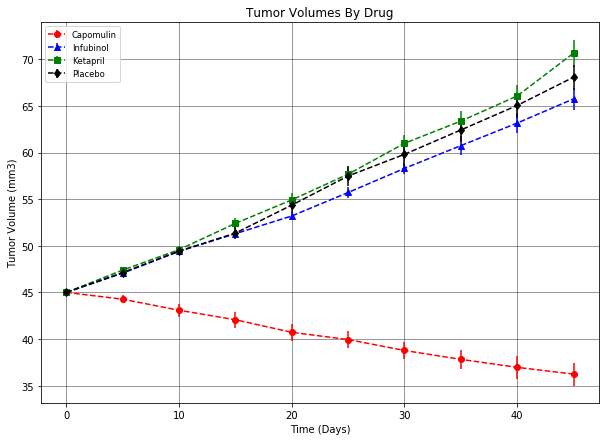

In [55]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize = (10,7))

cap_m = mean_tumor_vol_df_2["Mean Tumor Volume"]['Capomulin']
cap_std= std_tumor_vol_df_2["Std Error Tumor Volume"]['Capomulin']

inf_m = mean_tumor_vol_df_2["Mean Tumor Volume"]['Infubinol']
inf_std= std_tumor_vol_df_2["Std Error Tumor Volume"]['Infubinol']

ket_m = mean_tumor_vol_df_2["Mean Tumor Volume"]['Ketapril']
ket_std= std_tumor_vol_df_2["Std Error Tumor Volume"]['Ketapril']

plac_m = mean_tumor_vol_df_2["Mean Tumor Volume"]['Placebo']
plac_std= std_tumor_vol_df_2["Std Error Tumor Volume"]['Placebo']


ax.errorbar(np.arange(0,50,5), cap_m, yerr=cap_std, fmt="o", color="r", alpha=1, label="Capomulin", linestyle='--')
ax.errorbar(np.arange(0,50,5), inf_m, yerr=inf_std, fmt="^", color="b", alpha=1, label="Infubinol", linestyle='--')
ax.errorbar(np.arange(0,50,5), ket_m, yerr=ket_std, fmt="s", color="g", alpha=1, label="Ketapril", linestyle='--')
ax.errorbar(np.arange(0,50,5), plac_m, yerr=plac_std, fmt="d", color="k", alpha=1, label="Placebo", linestyle='--')

ax.grid(b=True, which='major', color='k', alpha=.5, linestyle='-')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Tumor Volumes By Drug")

# Save the Figure
plt.savefig("TumorVolumesByDrug.png")
fig.show()


## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = merged_data_gb["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame({"Metastatic Sites": mean_met_site})

# Preview DataFrame
mean_met_site_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [44]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_met_site = merged_data_gb["Metastatic Sites"].agg(np.std)/np.sqrt(merged_data_gb["Metastatic Sites"].count())

# Convert to DataFrame
std_met_site_df = pd.DataFrame({"Metastatic Sites": std_met_site})

# Preview DataFrame
std_met_site_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [45]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_df_2 = mean_met_site_df.unstack(level=0)
std_met_site_df_2 = std_met_site_df.unstack(level=0)

# Preview that Reformatting worked
mean_met_site_df_2

# # Minor Data Munging to Re-Format the Data Frames
# mean_tumor_vol_df_2 = mean_tumor_vol_df.set_index(["Drug", "Timepoint"]).unstack(level=0)
# std_tumor_vol_df_2 = std_tumor_vol_df.set_index(["Drug", "Timepoint"]).unstack(level=0)

# # Preview that Reformatting worked
# mean_tumor_vol_df_2


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

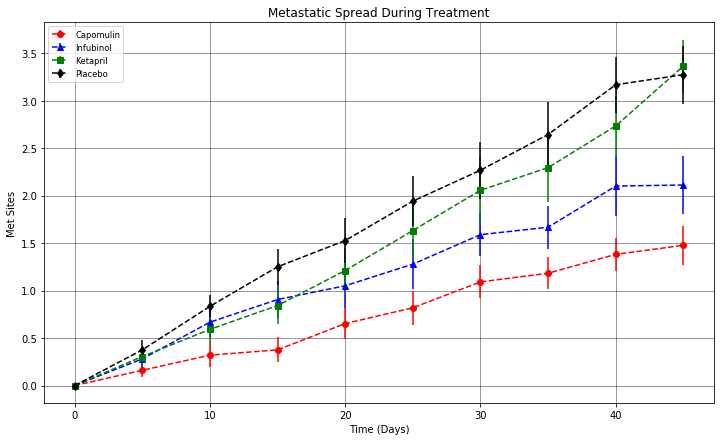

In [56]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize = (12,7))

cap_meta_m = mean_met_site_df_2["Metastatic Sites"]['Capomulin']
cap_meta_std = std_met_site_df_2["Metastatic Sites"]['Capomulin']

inf_meta_m = mean_met_site_df_2["Metastatic Sites"]['Infubinol']
inf_meta_std = std_met_site_df_2["Metastatic Sites"]['Infubinol']

ket_meta_m = mean_met_site_df_2["Metastatic Sites"]['Ketapril']
ket_meta_std = std_met_site_df_2["Metastatic Sites"]['Ketapril']

plac_meta_m = mean_met_site_df_2["Metastatic Sites"]['Placebo']
plac_meta_std = std_met_site_df_2["Metastatic Sites"]['Placebo']

ax.errorbar(np.arange(0,50,5), cap_meta_m, yerr=cap_meta_std, fmt="o", color="r", alpha=1, label="Capomulin", linestyle='--')
ax.errorbar(np.arange(0,50,5), inf_meta_m, yerr=inf_meta_std, fmt="^", color="b", alpha=1, label="Infubinol", linestyle='--')
ax.errorbar(np.arange(0,50,5), ket_meta_m, yerr=ket_meta_std, fmt="s", color="g", alpha=1, label="Ketapril", linestyle='--')
ax.errorbar(np.arange(0,50,5), plac_meta_m, yerr=plac_meta_std, fmt="d", color="k", alpha=1, label="Placebo", linestyle='--')

ax.grid(b=True, which='major', color='k', alpha=.5, linestyle='-')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreat.png")

# Show the Figure
fig.show()



## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
cnt_mice = merged_data_gb['Mouse ID'].count()

# Convert to DataFrame
cnt_mice_df = pd.DataFrame({"Mice Count": cnt_mice})
cnt_mice_df = cnt_mice_df.reset_index()

# Preview DataFrame
cnt_mice_df.head()


Drug  Timepoint  Mice Count
0  Capomulin          0          25
1  Capomulin          5          25
2  Capomulin         10          25
3  Capomulin         15          24
4  Capomulin         20          23

In [48]:
# Minor Data Munging to Re-Format the Data Frames
cnt_mice_df_2 = cnt_mice_df.set_index(["Drug", "Timepoint"]).unstack(level=0)

# Preview the Data Frame
cnt_mice_df_2.head()


Mice Count                                                        \
Drug       Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                    
0                 25       25        25       25       25      25       26   
5                 25       21        25       23       23      24       25   
10                25       20        21       22       21      24       23   
15                24       19        21       19       21      20       17   
20                23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

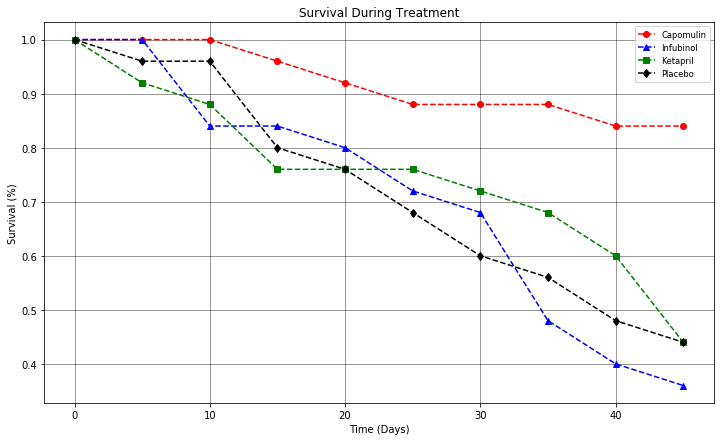

In [52]:
# Generate the Plot (Accounting for percentages)
cnt_mice_df_3 = pd.DataFrame(cnt_mice_df_2.loc[0, :]).unstack(level=1)
survivor_percent_mice_df = cnt_mice_df_2/cnt_mice_df_3.values[0,:]

cap_survival_m = survivor_percent_mice_df["Mice Count"]['Capomulin']
inf_survival_m = survivor_percent_mice_df["Mice Count"]['Infubinol']
ket_survival_m = survivor_percent_mice_df["Mice Count"]['Ketapril']
plac_survivl_m = survivor_percent_mice_df["Mice Count"]['Placebo']

fig, ax = plt.subplots(figsize = (12,7))

# Show the Figure
ax.plot(np.arange(0,50,5), cap_survival_m, marker="o", color="r", alpha=1, label="Capomulin", linestyle='--')
ax.plot(np.arange(0,50,5), inf_survival_m, marker="^", color="b", alpha=1, label="Infubinol", linestyle='--')
ax.plot(np.arange(0,50,5), ket_survival_m, marker="s", color="g", alpha=1, label="Ketapril", linestyle='--')
ax.plot(np.arange(0,50,5), plac_survivl_m, marker="d", color="k", alpha=1, label="Placebo", linestyle='--')

ax.grid(b=True, which='major', color='k', alpha=.5, linestyle='-')

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival (%)")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("SurvivalDuringTreat.png")

# Show the Figure
fig.show()

## Summary Bar Graph

In [105]:
# Calculate the percent changes for each drug
mean_tumor_vol_df_3 = pd.DataFrame(mean_tumor_vol_df_2.loc[0, :]).unstack(level=1)
mean_tumor_vol_df_4 = pd.DataFrame(mean_tumor_vol_df_2.loc[45, :]).unstack(level=1)

tumor_percent_chnge_df = (mean_tumor_vol_df_4/mean_tumor_vol_df_3.values[0,:])-1

# Display the data to confirm
tumor_percent_chnge_df

45                                                   \
Drug              Capomulin  Ceftamin Infubinol  Ketapril  Naftisol  Placebo   
Mean Tumor Volume -0.194753  0.425165  0.461235  0.570288  0.539233  0.51298   

                                                           
Drug               Propriva  Ramicane  Stelasyn Zoniferol  
Mean Tumor Volume  0.472412 -0.223209  0.520851  0.465798

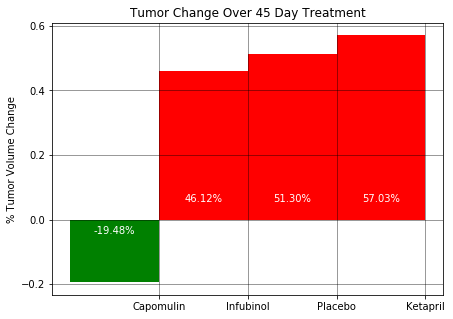

In [109]:
# Store all Relevant Percent Changes into a Tuple
tumor_percent_chnge = tumor_percent_chnge_df[45][["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_percent_chnge = tumor_percent_chnge.sort_values(by = 'Mean Tumor Volume', axis=1)
tumor_percent_chnge = tumor_percent_chnge.T

# Splice the data between passing and failing drugs
tumor_percent_chnge['colors'] = 'g'
tumor_percent_chnge.loc[tumor_percent_chnge['Mean Tumor Volume']>=0,'colors'] = 'r'

plt.figure(figsize=(7,5))
bars = plt.bar(tumor_percent_chnge.index,tumor_percent_chnge['Mean Tumor Volume'], color=tumor_percent_chnge.colors, width= -1, align = 'edge')
plt.grid(b=True, which='major', color='k', alpha=.5, linestyle='-')

# Orient widths. Add labels, tick marks, etc. 
plt.yticks(np.arange(-.2,.65,0.2))
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# # Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., .05*(height/abs(height)),
                "{0:.2%}".format(float(height)),
                ha='center', va='bottom', color="w")

# # Call functions to implement the function calls
autolabel(bars)
`
# Save the Figure
plt.savefig("%TumorVolumeChange.png")

# Show the Figure
fig.show()

### Observable Trends

In [ ]:
# 1. Capomulin appears to be the most effective drug in reducing tumor volumes
# 2. No drug appears to thwart Metastatic spread, though Capomulin appears to do the best job of at least stunting their growth
# 3. Less than half the mice taking Infubinol and Keapril survive longer than 60 days which is approximately the same result seen 
#   from the mice taking the placebo drug, suggesting these two drugs have no use at all as a mitigant to cancer